---
# Multi-Layer Perceptron
---

### Perceptron Basic and History

The Perceptron, that neural network whose name evokes how the future looked from the perspective of the 1950s, is a simple algorithm intended to perform binary classification; i.e. it predicts whether input belongs to a certain category of interest or not (ex: fraud/ not-fraud).

The perceptron is a linear classifier — an algorithm that classifies input by separating two categories with a straight line. Input is typically a feature vector xmultiplied by weights w and added to a bias b: y = w * x + b.

Perceptrons produce a single output based on several real-valued inputs by forming a linear combination using input weights (and sometimes passing the output through a non-linear activation function).

Rosenblatt built a single-layer perceptron ; it did not include multiple layers, which allow neural networks to model a feature hierarchy. It was, therefore, a shallow neural network, which ended up preventing his perceptron from performing non-linear classification, such as the classic logic XOR function (an XOR operator trigger when input exhibits either one trait or another, but not both; it stands for “exclusive OR”).

Fast forward to 1986, when Hinton, Rumelhart, and Williams published a paper “Learning representations by back-propagating errors”, introducing backpropagation and hidden layers concepts — therefore so to speak giving birth to Multilayer Perceptrons (MLPs):

- Backpropagation, a procedure to repeatedly adjust the weights so as to minimize the difference between actual output and desired output
- Hidden Layers, which are neuron nodes stacked in between inputs and outputs, allowing neural networks to learn more complicated features (such as XOR logic)

### Multi-Layer Perceptron Introduction

A multi-layer perceptron (MLP) has the same structure of a single layer perceptron with one or more hidden layers. The backpropagation algorithm consists of two phases: the forward phase where the activations are propagated from the input to the output layer, and the backward phase, where the error between the observed actual and the requested nominal value in the output layer is propagated backwards in order to modify the weights and bias values.

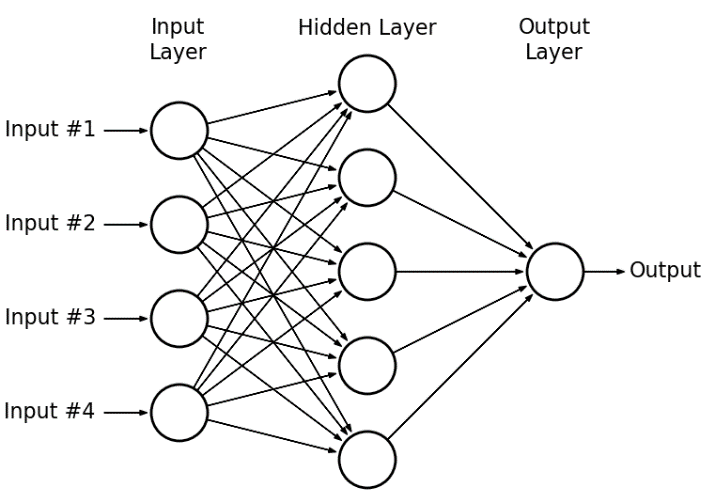

## Task
This project is implemented for a projct of Class 577 Statistic. I finished this project with Chirs, Haoyang, and Carlos. 

In order to do this we will need the following libraries:
- [matplotlib] (https://matplotlib.org/)
- [pandas] (https://pandas.pydata.org/)
- [numpy] (https://numpy.org/)
- [seaborn] (https://seaborn.pydata.org/)
- [scikit-learn] (https://scikit-learn.org/)
...

In [7]:
# Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns

## Prepare Data and Check information

### Import the data

In [8]:
df = pd.read_csv ('kc_house_data.csv')

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Change data type

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
# change date to datetime formati
df['date'] = pd.to_datetime(df['date'])

### Replace Null value

In [13]:
df.isnull().count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [14]:
# Get number of missing values in each column
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Check duplicated values

In [15]:
# Cheking for duplicated rows
duplicates = df[df.duplicated()]
print(len(duplicates))

0


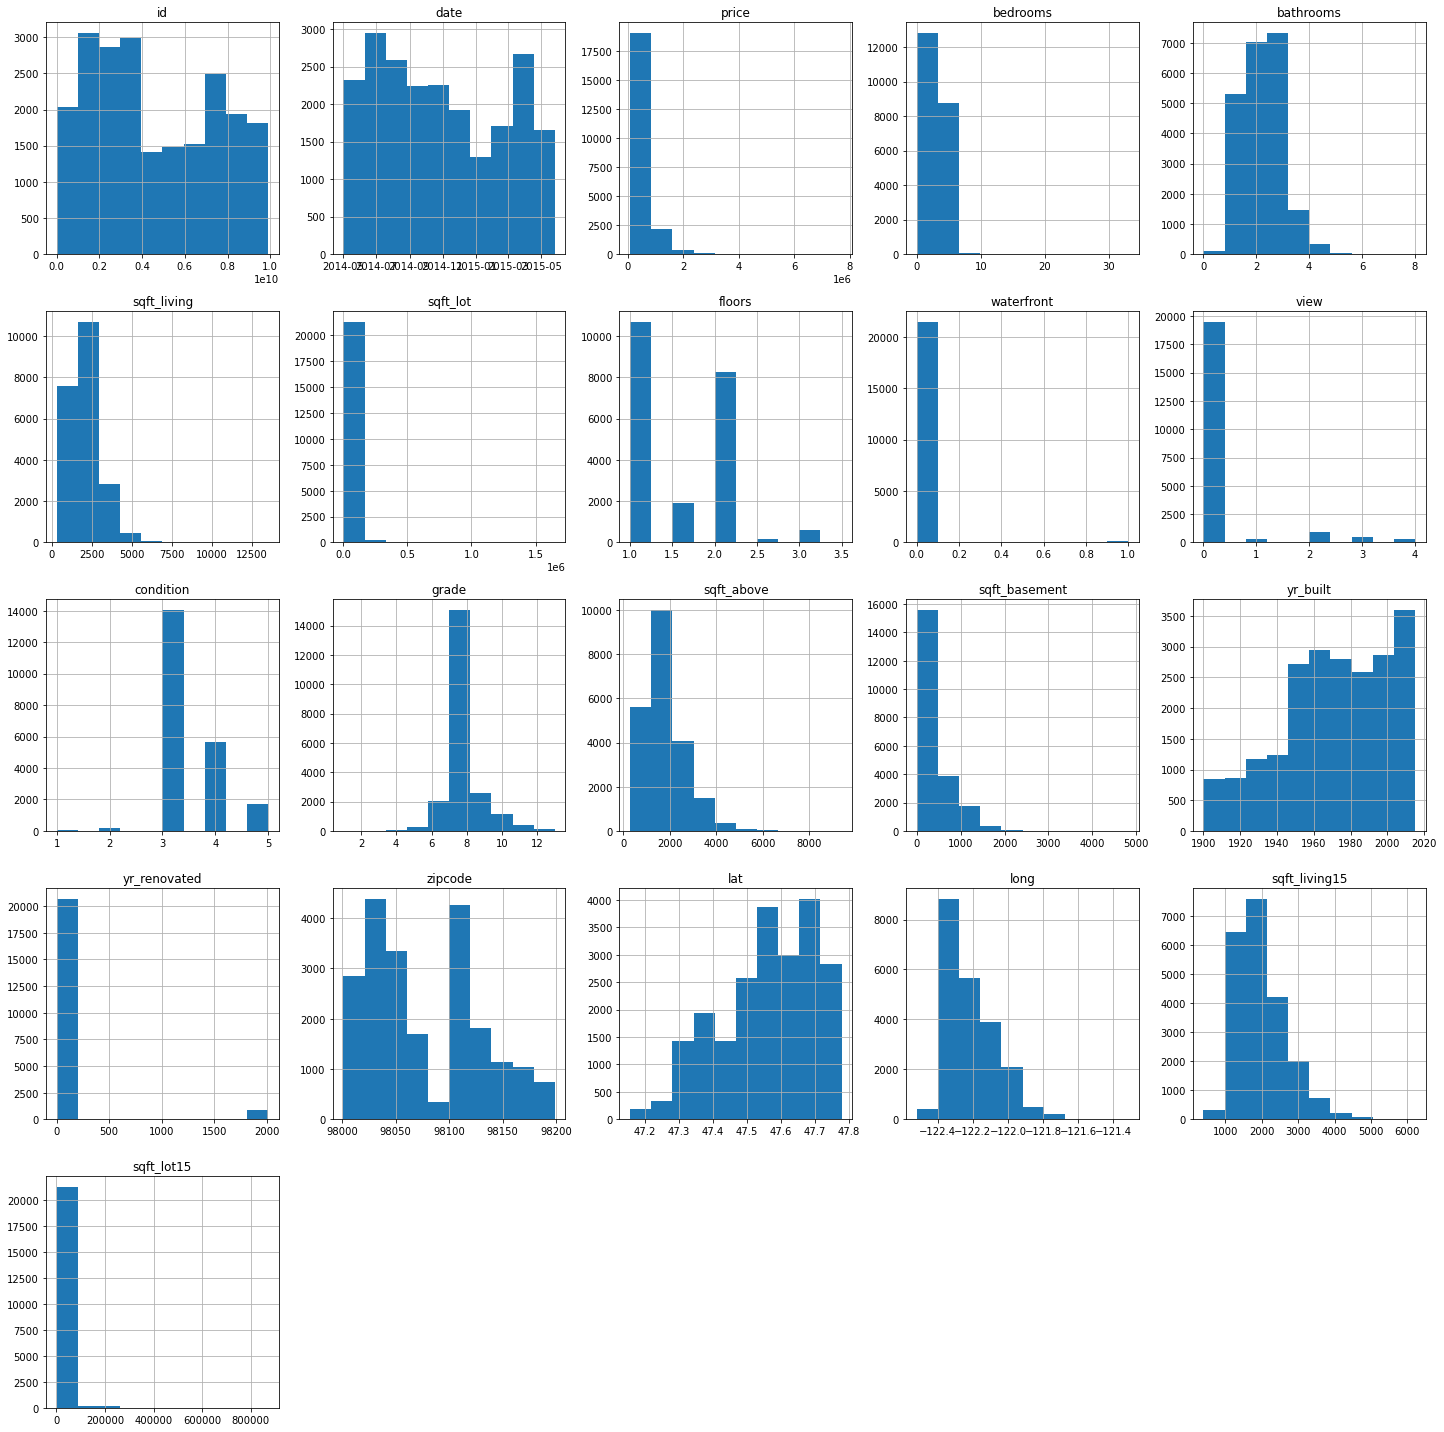

In [16]:
# View the distributions using histograms to get a sense of the spread of the various features.
# How to remove ID and date????

df.hist(figsize = (20,20))
plt.tight_layout()
plt.show()

we note that most of the  price under 3,000,000$, we need remove the outliers;

number of bedrooms should be less than 10; 

number of bathrooms should be less than 6; 

-sqft_living <  7500;

-sqft_lot < 500,000;

-waterfront should be a binary 1/0 feature;

-yr_renovated shold remove value '0';

-sqft_lot15 should < 200,000


We will consider potential outliers in bedrooms, bathrooms and the sqft-type features.

### Investigate bedrooms

In [17]:
# Investigate bedrooms
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [18]:
# Find the records with bedroom=33
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [19]:
# This 33 should be a typo of 3, and we correct it
# Fix typo for bedrooms
df.loc[15870, 'bedrooms'] = 3

### Investigate price

In [20]:
df['price'].describe().round(0)

count      21613.0
mean      540088.0
std       367127.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

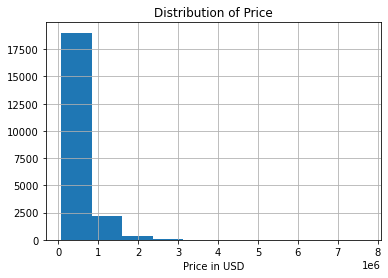

In [21]:
# View price distribution
df['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

In [22]:
df_less4 = df[df['price'] <= 4000000]

In [23]:
df_less4['price'].describe().round(0)

count      21602.0
mean      537547.0
std       348598.0
min        75000.0
25%       321500.0
50%       450000.0
75%       645000.0
max      4000000.0
Name: price, dtype: float64

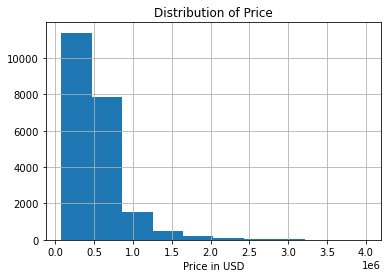

In [24]:
# View price distribution
df_less4['price'].hist()
plt.xlabel('Price in USD')
plt.title ('Distribution of Price')
plt.show()

### Investigate sqft_living

In [25]:
df['sqft_living'].describe().round(0)

count    21613.0
mean      2080.0
std        918.0
min        290.0
25%       1427.0
50%       1910.0
75%       2550.0
max      13540.0
Name: sqft_living, dtype: float64

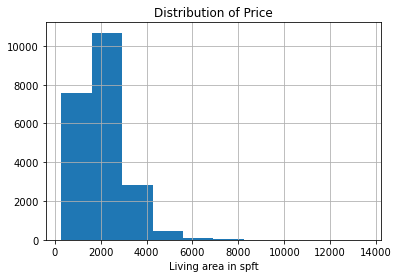

In [26]:
# View price distribution
df['sqft_living'].hist()
plt.xlabel('Living area in spft')
plt.title('Distribution of Price')
plt.show()

### Investigate sqft_lot

In [27]:
df['sqft_lot'].describe().round(0)

count      21613.0
mean       15107.0
std        41421.0
min          520.0
25%         5040.0
50%         7618.0
75%        10688.0
max      1651359.0
Name: sqft_lot, dtype: float64

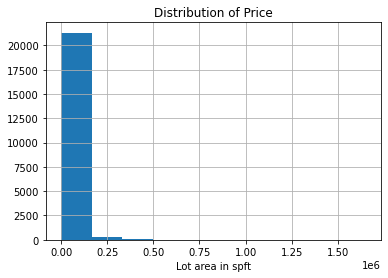

In [28]:
# View price distribution
df['sqft_lot'].hist()
plt.xlabel('Lot area in spft')
plt.title('Distribution of Price')
plt.show()

###  Ploting

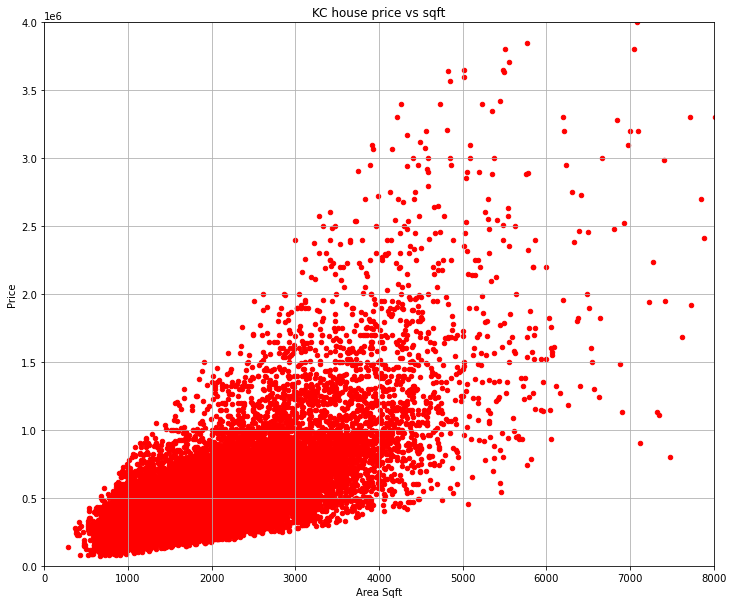

In [29]:
#plt.scatter(df.loc ['sqft_lot'],            df.loc ['price'],             )

df.plot(kind='scatter',x= 'sqft_living',y='price',color='red',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0.0, 8000), ylim=(0, 4000000) )
plt.xlabel('Area Sqft')
plt.ylabel('Price')
plt.title('KC house price vs sqft')
plt.show()

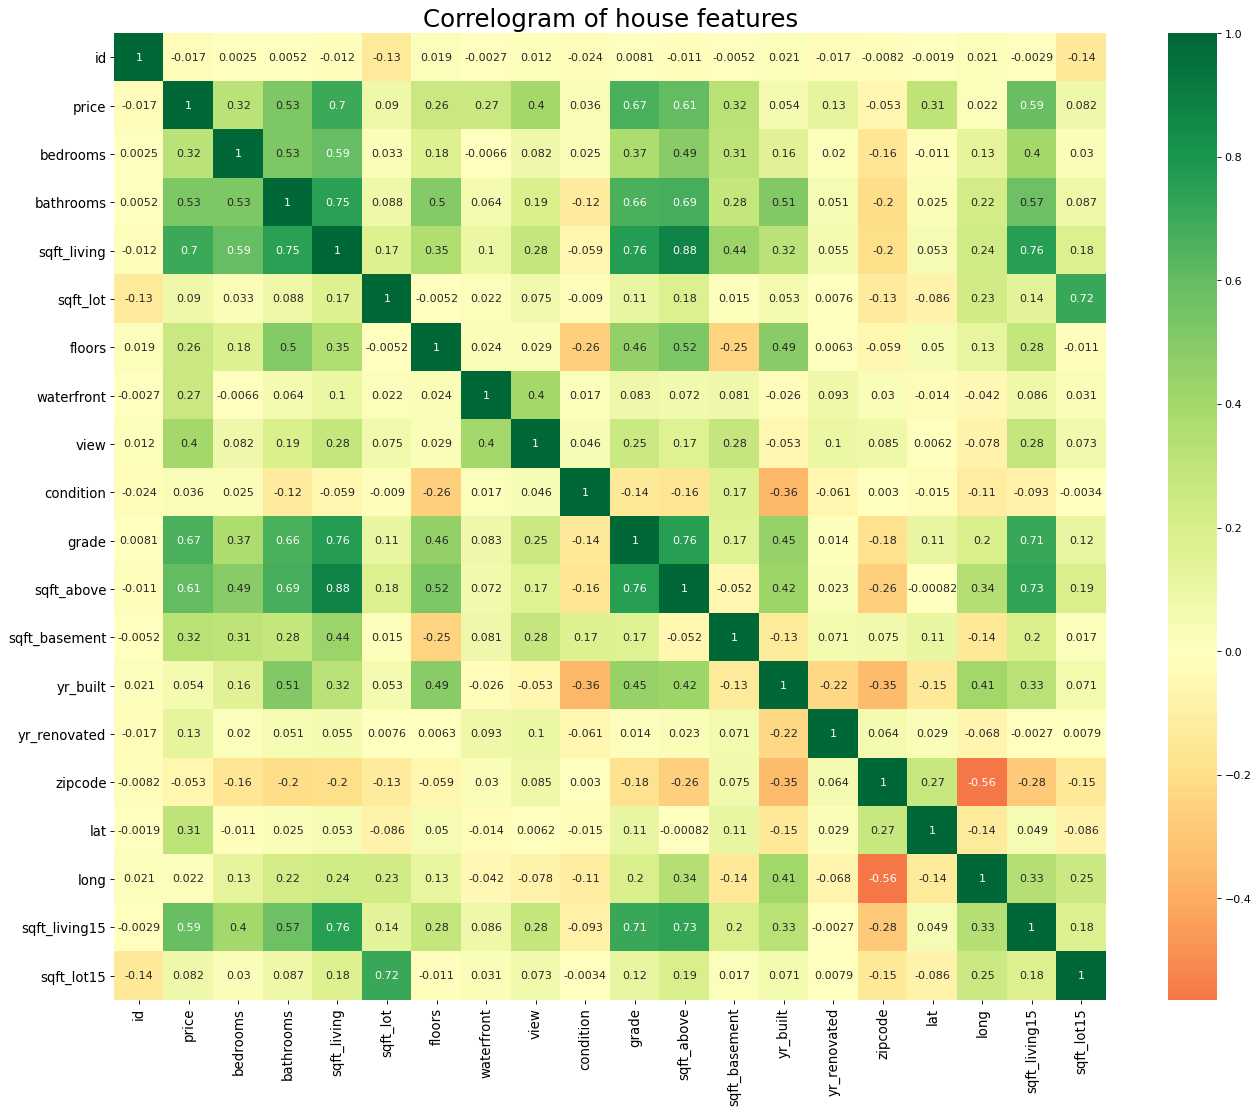

In [30]:
# Plot
plt.figure(figsize=(20,16), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.yticks(fontsize=12)
plt.title('Correlogram of house features', fontsize=22)
plt.xticks(fontsize=12)
plt.show()

In [31]:
# create a copy of df with price less than 2 million
df_less2 = df[df['price'] <= 2000000]

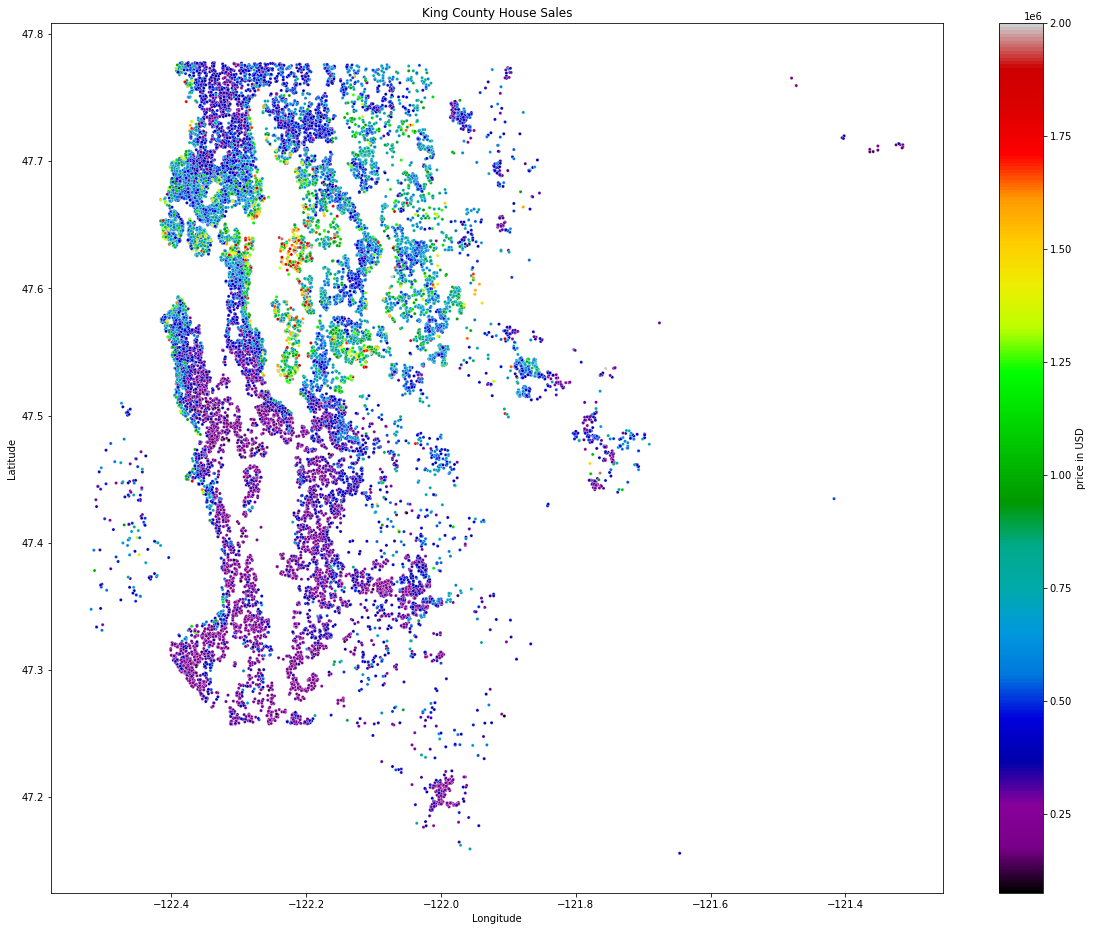

In [32]:
# Plot scatter plot
plt.figure(figsize = (20,16))
ax = sns.scatterplot(x = df_less2['long'], y = df_less2['lat'], hue = df_less2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_less2)

norm = plt.Normalize(df_less2['price'].min(), df_less2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

### Investigate Zipcode 

In [33]:
df_less2.shape

(21415, 21)

In [34]:
# Explore zipcode
df_less2['zipcode'].value_counts()

98103    602
98038    590
98115    582
98052    573
98117    553
        ... 
98010    100
98102    100
98024     81
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

In [35]:
# Extract price and zipcode from our dataset
df_zip = df_less2[['zipcode', 'price']]

In [36]:
df_zip

,zipcode,price
0,98178,221900.0
1,98125,538000.0
2,98028,180000.0
3,98136,604000.0
4,98074,510000.0
...,...,...
21608,98103,360000.0
21609,98146,400000.0
21610,98144,402101.0
21611,98027,400000.0


In [37]:
# Groupby zipcode and take median price
df_zipmean = df_zip.groupby(df_zip['zipcode']).median()

In [39]:
# Reset index after groupy
df_zipmean = df_zipmean.reset_index()

# Change type to str
df_zipmean['zipcode'] = df_zipmean['zipcode'].astype(str)

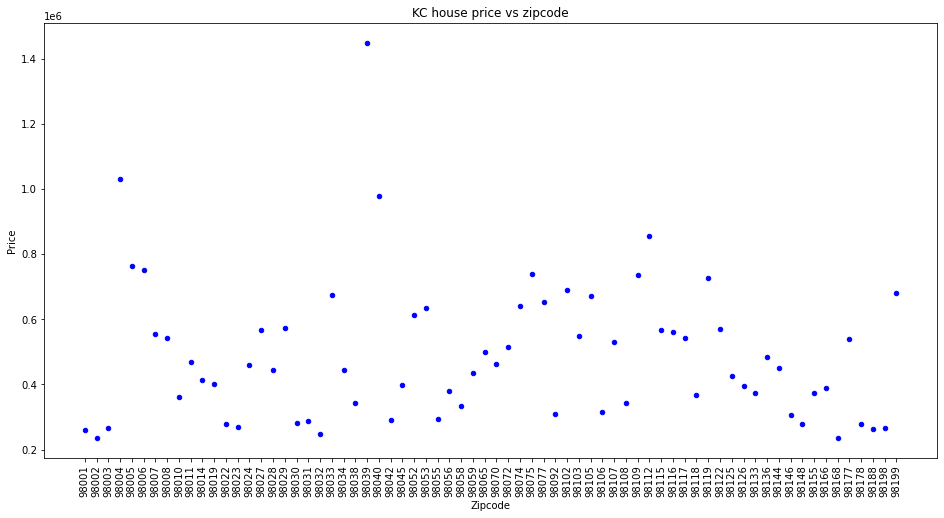

In [40]:
df_zipmean.plot(kind='scatter',x='zipcode', y='price', color='blue',figsize = (16,8))
# sns.scatterplot (x = df_zipmean['price'], y = df_zipmean['zipcode'], data = df_zipmean)
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.title('KC house price vs zipcode')
plt.show()

In [41]:
# Get top 10 zipcode mean prices
dftop10 = df_zipmean.sort_values('price', ascending = False)[:10]

## Price vs Features

### Binary features - Waterfront

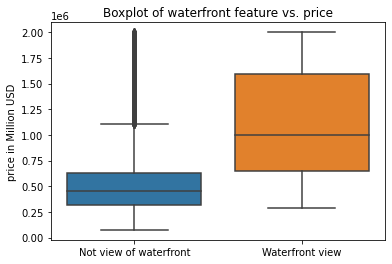

In [42]:
# Plot boxplot of waterfront feature
sns.boxplot(x = df_less2['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in Million USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [43]:
waterfrontmean = df_less2[df_less2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = df_less2[df_less2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

The mean house price for a house with waterfront view is USD 1100167.45
The mean house price for a house without waterfront view is USD 516230.38


In [44]:
# Percentage of house with frontwater view
Water_percentage =len(df_less2[df_less2['waterfront'] == 1])/len(df_less2)*100
print ('Percentage of house have waterfront view is ' ,Water_percentage , "%")

Percentage of house have waterfront view is  0.5463460191454588 %


### Categorical features

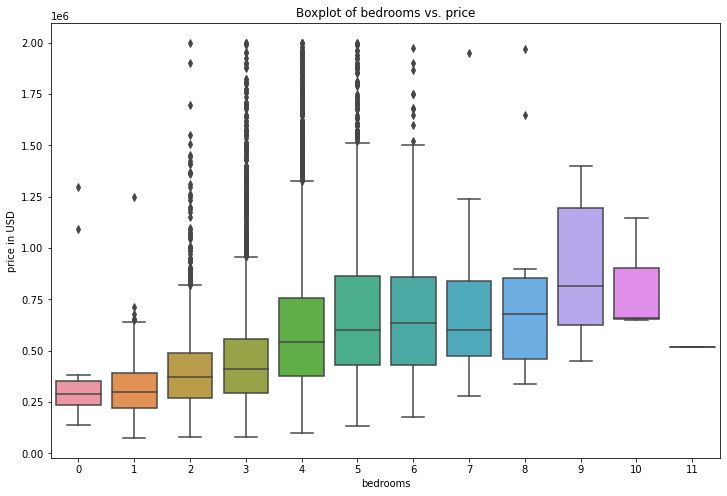

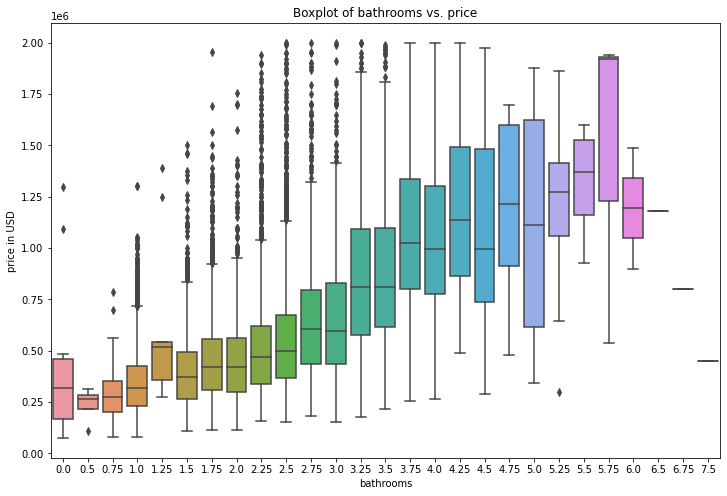

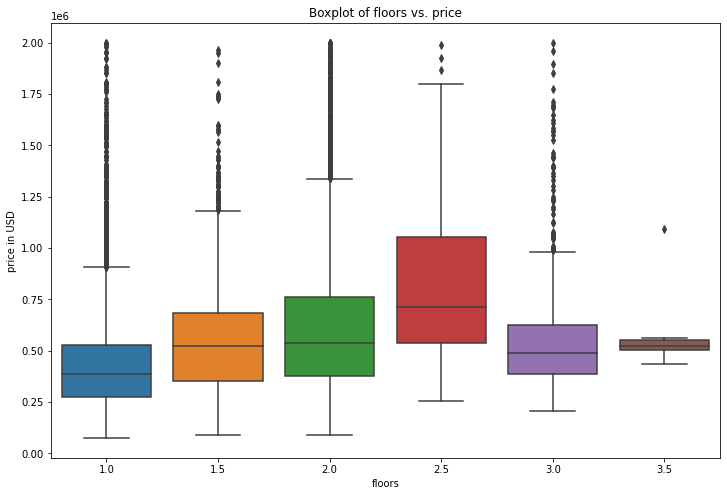

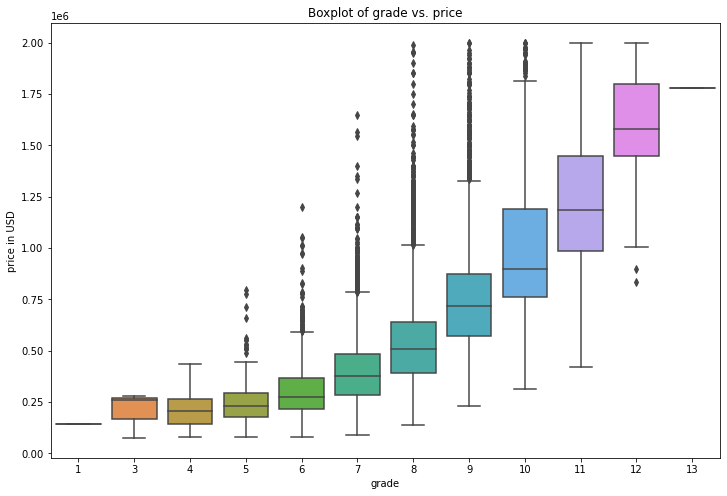

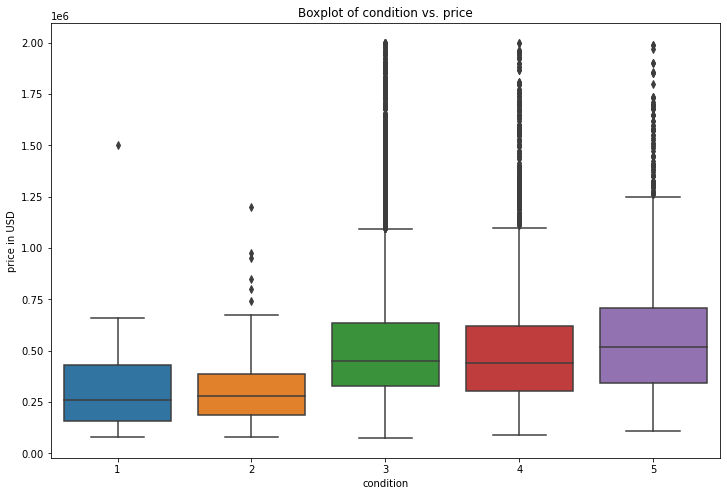

In [45]:
# Define categorical variables
categorical_features = ['bedrooms', 'bathrooms', 'floors','grade', 'condition']

# Plot boxplots
for feature in categorical_features:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = df_less2[feature], y = df_less2['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

### Continuous features

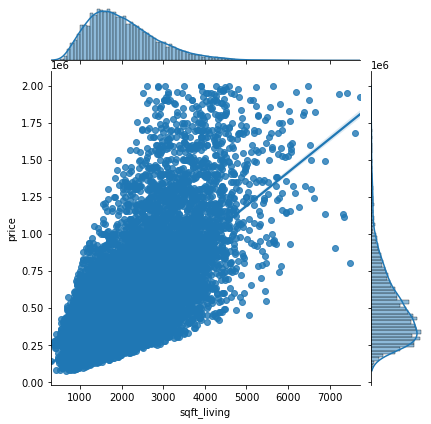

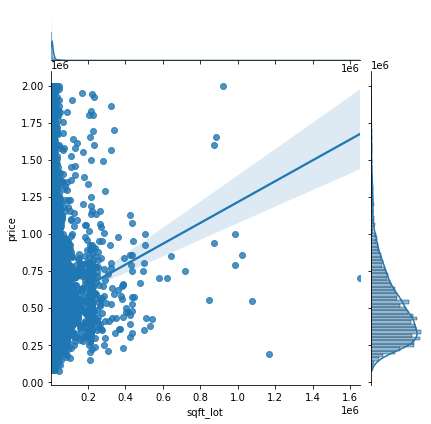

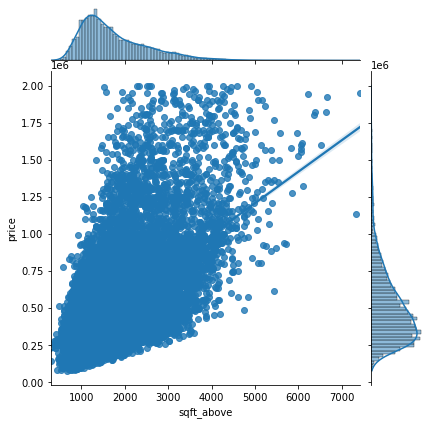

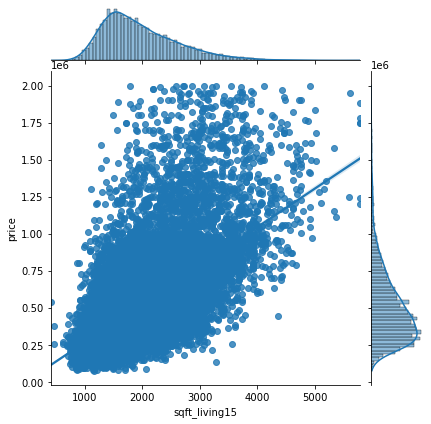

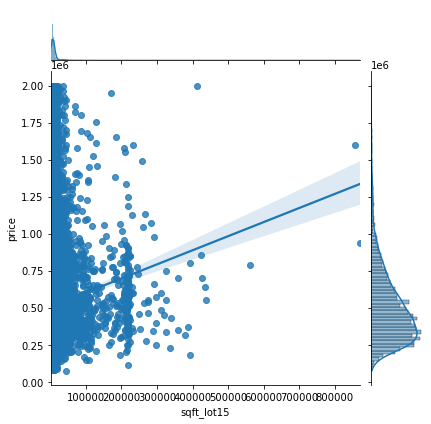

In [46]:
# Define list of continuous variables
continous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in continous_features:
    sns.jointplot(x = df_less2[feature], y = df_less2['price'], kind = 'reg')


## Selcect features and clean data

In [47]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [48]:
#  df_clean = df_less2.drop(['id', 'date','sqft_above','sqft_lot', 'sqft_living15', 
#                            'sqft_lot15','floors','view','condition','lat', 'long',
#                           'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',], axis = 1)
df_clean = df_less2.drop(['id', 'date', 'sqft_lot', 'waterfront', 'condition', 'bedrooms',
                           'sqft_lot15','floors','view','lat', 'long',
                          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',], axis = 1)

In [49]:
df_clean.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


## Train-Test Split Data

In [50]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [51]:
# Split features X and target y
X = df_clean.drop('price', axis = 1)
y = df_clean['price']

In [52]:
# Train-test split (10% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [53]:
# A brief preview of train-test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

19273 2142 19273 2142


## MLP Model

The algorithm used for analyzing the data was neural networks. A six hidden layer network was built (see figure below) based on the tensor flow technique. This network combines the “wide” and “deep'' approaches, initially allowing for multiple connections from the input nodes to the first hidden layer and restricting the number of connections at each layer. This provides the model with more flexibility in determining the weights of each feature at each layer. However, while this approach is generally more accurate, it also increases the probability of overfitting and significantly increases computational complexity. 



In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import activations
from keras.utils.vis_utils import plot_model

### Train-Test Split Data

In [59]:

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_np)
X_test_s = scaler.fit_transform(X_test_np)

X_train_s, X_valid_s, y_train_np, y_valid_np = train_test_split(X_train_s, y_train_np)

In [60]:


input_ = keras.layers.Input(shape=X_train_s.shape[1])
hidden1 = keras.layers.Dense(50, activation = activations.relu)(input_)
hidden2 = keras.layers.Dense(40, activation = activations.relu)(hidden1)
hidden3 = keras.layers.Dense(30, activation = activations.relu)(hidden2)
hidden4 = keras.layers.Dense(20, activation = activations.relu)(hidden3)
hidden5 = keras.layers.Dense(10, activation = activations.relu)(hidden4)
hidden6 = keras.layers.Dense(8, activation = activations.relu)(hidden5)
output = keras.layers.Dense(1, activation = activations.relu)(hidden6)

model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')


history = model.fit(X_train_s, y_train_np, epochs = 10, validation_data = (X_valid_s, y_valid_np))

mse_test = model.evaluate(X_test_s, np.array(y_test_np))
print(mse_test)

X_new = X_test_s
y_hat = model.predict(X_new)

print("predict", y_hat)
print("actual", np.array(y_test))

plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
452/452 [==============================] - 1s 1ms/step - loss: 206055538688.0000 - val_loss: 62058459136.0000
Epoch 2/10
452/452 [==============================] - 0s 1ms/step - loss: 47480385536.0000 - val_loss: 40134553600.0000
Epoch 3/10
452/452 [==============================] - 0s 1ms/step - loss: 37452726272.0000 - val_loss: 38318067712.0000
Epoch 4/10
452/452 [==============================] - 0s 1ms/step - loss: 36494376960.0000 - val_loss: 37775441920.0000
Epoch 5/10
452/452 [==============================] - 0s 997us/step - loss: 36197666816.0000 - val_loss: 37654208512.0000
Epoch 6/10
452/452 [==============================] - 0s 1ms/step - loss: 35966697472.0000 - val_loss: 37313110016.0000
Epoch 7/10
452/452 [==============================] - 0s 972us/step - loss: 35807055872.0000 - val_loss: 37183295488.0000
Epoch 8/10
452/452 [==============================] - 0s 1ms/step - loss: 35672514560.0000 - val_loss: 37149540352.0000
Epoch 9/10
452/452 [===============

[337594.75 397578.9  350161.9  ... 473483.6  267077.72 481600.53]
[234950. 400000. 430000. ... 575000. 521000. 300000.]
[0.05263833 0.00124159 0.04094261 ... 0.0520597  0.13021655 0.09312848]


Text(0, 0.5, 'RMSE: 186679.95\nAverage Percent Error: 6.9%\nDatapoints below 6.9 = 1326\nDatapoints above 6.9 = 816')

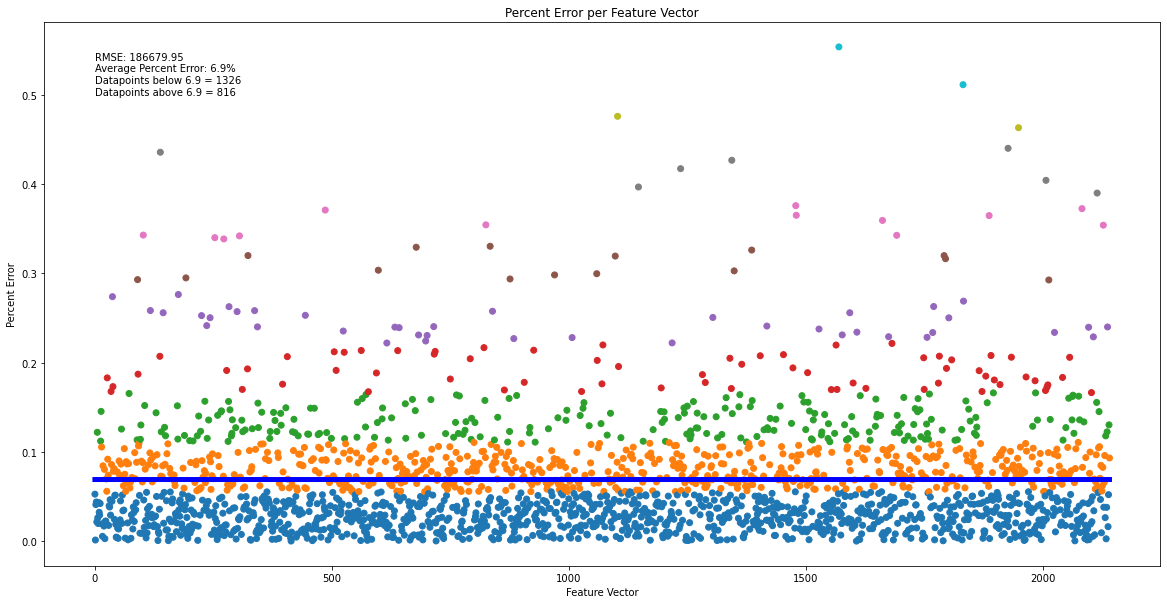

In [55]:
fig, ax = plt.subplots(1,1,figsize = (20,10))

print(y_hat[:,0])
print(y_test_np)

percent_error = (np.sqrt((y_hat[:,0] - y_test_np)**2))/np.max(y_test_np)
print(percent_error)

ax.scatter(range(y_hat.shape[0]), percent_error, c = percent_error, cmap = 'tab10')

ax.set_title('Percent Error per Feature Vector')
ax.set_ylabel('Percent Error')
ax.set_xlabel('Feature Vector')

RMSE = np.round(np.sqrt(mean_squared_error(y_test_np, y_hat)),2)
MPE = np.round(percent_error.sum()/y_hat.shape[0],3) * 100

ax.plot(range(y_hat.shape[0]), np.ones(y_hat.shape[0]) * MPE/100, color = 'b', linewidth = 5.0)


line1 = "RMSE: " + str(RMSE)
line2 = "\nAverage Percent Error: " + str(MPE) +"%"
line3 = "\nDatapoints below " + str(MPE) + " = " + str((percent_error < MPE/100).sum())
line4 = "\nDatapoints above " + str(MPE) + " = " + str((percent_error > MPE/100).sum())

text = line1 + line2 + line3 + line4
ax.text(0,.5, text)


## Conclusion

The top five features (same as linear and multiple linear regression) were selected to confirm the model’s viability model, then increased to 10 parameters (same used in multiple linear regression)  and all features to demonstrate the change in RMSE. The results of each feature selection are shown below.

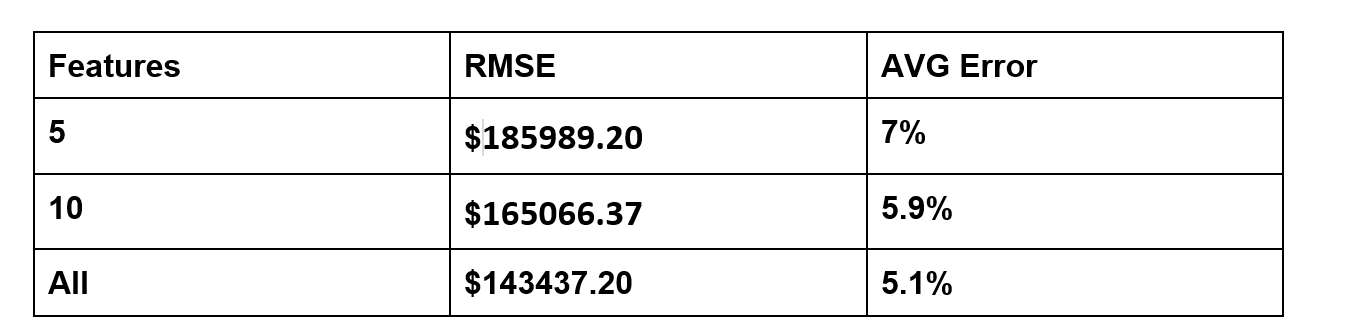

The previous results show that as the number of features increases, the accuracy increases. However, the reduction in the error from five to ten parameters (1.1%) is more significant than the decrease in the average error from 10 parameters to 18 parameters (0,8%). 

The data follows a “shotgun blast” where the data becomes tighter as x decreases and larger as it increases. This provides an issue for linear regression, which attempts to fit a line to minimize the RMSE, which leads to the model assigning heavier weight to the larger values as it determines the best fit. If the features increase from one to five and five to ten, the RMSE decreases due to the increased freedom of movement of the model. The model, however, is still limited by its linearity and skews towards fitting the larger values versus the most values. 


Neural networks have more flexibility when compared to linear regression. They are not bound by linearity, can bend and curve to represent more data, and can assign weights to represent the complex interactions of feature vectors on predictions. This does, however, make neural networks highly susceptible to overfitting the data, and care should be taken when training, validating, and testing the model to ensure accuracy on future predictions. As the number of features increased, the accuracy of the model also increased. The increased freedom of movement allows the model to more accurately predict the data and is not limited by linearity. 

